In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
tf.__version__

'2.6.0'

In [52]:
keras.__version__

'2.6.0'

## Classification

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

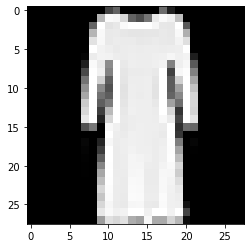

In [26]:
show_idx = np.random.randint(0, X_train_full.shape[0])
plt.imshow(X_train_full[show_idx], cmap='gray')

In [27]:
# create validation sets and standardize data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [28]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

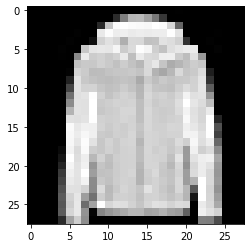

In [30]:
plt.imshow(X_train[0], cmap='gray')

In [32]:
# build neural network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # input layer (flatten 28*28 -> 784)
model.add(keras.layers.Dense(300, activation="relu")) # dense layer
model.add(keras.layers.Dense(100, activation="relu")) # dense layer
model.add(keras.layers.Dense(10, activation="softmax")) # output layer (same dim as # output classes)
# use softmax when output classes are mutually exclusive
# use sigmoid for binary classification

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [36]:
weights, biases = hidden1.get_weights()
print(f'weights: {weights.shape}') # 1 weight per input per neuron in layer
print(f'biases: {biases.shape}') # 1 bias per neuron in layer

weights: (784, 300)
biases: (300,)


In [39]:
print(f'first five weights for first input: {weights[0][:5]}') # randomly initialized weights before training
print(f'first five biases: {biases[:5]}') # biases set to 0 initially
# can also initialize differently (kernel_initializer, bias_initializer)
# kernel = matrix of weights

first five weights for first input: [ 0.04890981 -0.04766484  0.02511675  0.00372601 -0.05324029]
first five biases: [0. 0. 0. 0. 0.]


In [40]:
model.compile(loss="sparse_categorical_crossentropy", # use this loss for sparse labels (classes=exclusive), vs one-hot encoded class
              optimizer="sgd", # stochastic gradient descent
              metrics=["accuracy"])
# use binary_crosentropy for binary classification

In [41]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) # can also set validation_split=0.2 instead of passing val data
# can set class_weight argument for skewed data

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7289 - accuracy: 0.7619 - val_loss: 0.5031 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4909 - accuracy: 0.8288 - val_loss: 0.4537 - val_accuracy: 0.8440
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4451 - accuracy: 0.8458 - val_loss: 0.4483 - val_accuracy: 0.8392
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4186 - accuracy: 0.8526 - val_loss: 0.4085 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3973 - accuracy: 0.8602 - val_loss: 0.3825 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8663 - val_loss: 0.4062 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3668 - accuracy: 0.8711 - val_loss: 0.3733 - val_accuracy:

In [45]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.728860,0.761873,0.503085,0.8338
1,0.490918,0.828782,0.453721,0.8440
2,0.445074,0.845836,0.448255,0.8392
3,0.418609,0.852600,0.408488,0.8654
4,0.397316,0.860182,0.382483,0.8658
5,0.380319,0.866255,0.406186,0.8606
6,0.366842,0.871127,0.373268,0.8680
7,0.353888,0.874909,0.352464,0.8752
8,0.344450,0.877945,0.385067,0.8622
9,0.334186,0.881200,0.349313,0.8764


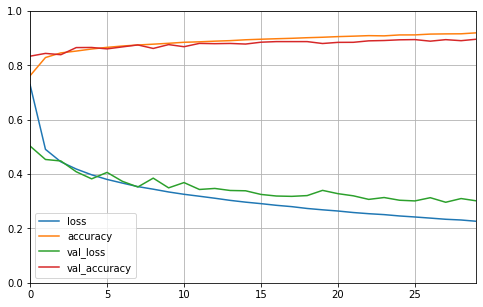

In [47]:
# plot training results
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8847


[0.32818055152893066, 0.8847000002861023]

In [49]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
# always retune learning rate after changing hyperparameters

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [60]:
class_names[9]

'Ankle boot'

In [62]:
y_preds

array([9, 2, 1], dtype=int64)

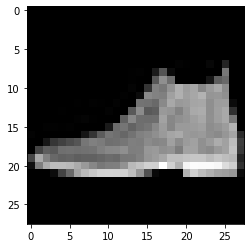

Ankle boot


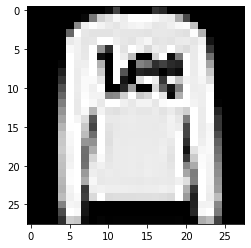

Pullover


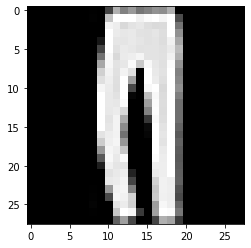

Trouser


In [65]:
y_preds = np.argmax(y_proba, axis=1)
for i in range(len(y_preds)):
    plt.imshow(X_new[i], cmap='gray')
    plt.show()
    print(class_names[y_preds[i]])

## Regression

In [66]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [71]:
housing.data.shape

(20640, 8)

In [72]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [75]:
housing.target_names

['MedHouseVal']

In [74]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [76]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [78]:
model = keras.models.Sequential([
    # use single hidden layer with low # neurons to avoid overfitting with noisy data
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # output layer only needs one neuron (only predicting one value), no activation function
])

In [79]:
model.compile(loss="mean_squared_error", optimizer="sgd") # loss=MSE for regression

In [80]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2119 - val_loss: 19.6257
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.9062 - val_loss: 9.9965
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9583 - val_loss: 3.1411
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5052 - val_loss: 39.3205
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1282 - val_loss: 0.4399
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3987 - val_loss: 0.3919
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3727 - val_loss: 0.3764
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3805 - val_loss: 0.5905
Epoch 9/20
363/363 [==============================] - ETA: 0s - loss: 0.401 - 0s 1ms/step - loss: 0.3967 - val_loss: 0.3710
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss:

In [83]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 858us/step - loss: 0.3745


In [84]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

In [87]:
# compare with sklearn regressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_preds = reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_preds)
print(f'keras mse: {mse_test:0.2f}')
print(f'sklearn mse: {reg_mse:0.2f}')

keras mse: 0.37
sklearn mse: 0.56
